# Transfer functions

With a basic understanding of the Laplace transform and the frequency domeain, we can now introduce transfer functions, which will form the basis of classical control theory. Put simply, a transfer function is the ratio of the output to the input of a system, represented in the frequency domain. For example, a transfer function might be something like

$$ \frac{Y\left(s\right)}{X\left(s\right)} = \frac{36}{s^2+3s+18} \text{.} $$

We can tell a huge amount about how a system will behave based purely on its transfer function. For example, with an undrestanding of transfer functions, we can predict the above system will be stable. In addition, it will oscillate and settle at twice the value of whatever we put into it. With experience, we can tell all of this without performing the inverse Laplace transform or solving anything. Let's test that by simulating it:

## The Python control library

Here, we will use Python's control library to make things far easier for us. We start here by installing the control library so Github will allow us to use it, before importing the package into the Python script. We'll set up our transfer function using the

    tf(num_coeffs, den_coeffs)
    
function, where the parameters are arrays describing the coefficients of $s$ in the numerator and denominator of the transfer function (starting with the highest power of $s$). With our above example, the numerator is a constant, so the coefficient array is simply $36$. However, the denominator coefficients are $1$, $3$, and $18$, so we put them in an array first. To initialise our transfer function, we'll use the line

    mytf = ct.tf(36, [1,3,18])

### Step responses

In this example, we're going to simulate what is called a *step response*. This is simply what happens to the output of a system if we input unity (1) into it. As an example, a step response for a robotic arm may refer to commanding the arm to an angle of one radian. The step response here would be the angle of the robotic arm over time as it (hopefully!) moves to an angle of one radian.

To implement a step response in Python using the control library, we can use the

    t,y = step_response(tf)

function. We input our TF into the step response function, and it computes the system output $y$ over time $t$. There are additional responses we may use such as the impulse response, which inputs a large but brief spike into the system before giving it zero. This is somewhat similar to hitting the system with a wrench or other blunt object when it won't behave. However, step responses are often more useful, since we usually give *setpoint* commands, where we ask the system to go to some value and stay there.

To implement a step response on our system, we'll use the line

    t,y_out = ct.step_response(mytf)

Once we have computed the output and time data, we can use matplotlib to plot the results:

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import control as ct

Text(0.5, 0, 'Time (s)')

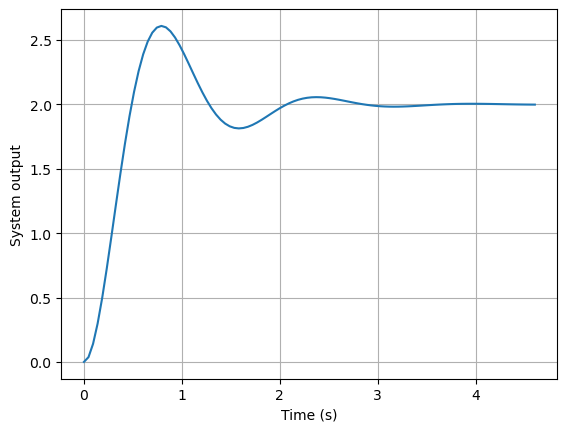

In [2]:
# Set up the transfer function using Python's control library
mytf = ct.tf(36, [1,3,18])
t,y_out = ct.step_response(mytf)

plt.plot(t,y_out)
plt.grid()
plt.ylabel('System output')
plt.xlabel('Time (s)')

As we can see, the output is stable, has settled on twice the input, and oscillates a bit as expected. But how did we predict that behaviour?

## DC gain

One technique we can use to predict the *steady-state value* (i.e. where the system settles at) is to use the DC gain of the system. This is extremely simple to calculate, as all we need to do is evaluate the transfer function after setting $s = 0$. For our system, we can obtain

$$ \text{DC gain} = \left. \frac{36}{s^2+3s+18} \right|_{s = 0} = \frac{36}{18} = 2 \text{.} $$

The value of the DC gain tells us the steady-state value for a unit step response. If we input some other constant value, we just multiply this value by the DC gain to obtain the steady-state output. For instance, if we input a value of 60, this system will have a steady-state output of 120.

## Poles

It is here we introduce the most important concept of control theory. Poles describe the fundamental behaviour of physical systems and will be used throughout this entire set of tutorials. We'll investigate them in depth another time, but for now we will introduce them. For a transfer function, **the poles of a system are the values of $s$ for which the denominator is equal to zero**. In other words, we can calculate the poles of a transfer function by setting the denominator to zero. For example,

$$ s^2+3s+18 = 0 \implies s = \frac{-3 \pm \sqrt{3^2-4\times 18}}{2} = \frac{-3}{2} \pm \frac{3\sqrt{7}}{2} j \text{.} $$

Thus, the poles of our system are

$$ p_1, p_2 = \frac{-3}{2} \pm \frac{3\sqrt{7}}{2} j \text{.} $$

Importantly, we will note that the poles are complex. While some poles are purely real, many have imaginary components. These imaginary components are what tell us about any oscillatory properties; having poles with imaginary parts indicates a system will oscillate to some extent. The larger these imaginary parts are relative to the real parts, the more they will induce oscillation.

### Stability of poles

The stability of a pole is easy to describe. A pole is *stable* if it has a *negative real part*. If it has a positive real part, it is *unstable*. Finally, if the real part is zero, the pole is *marginally stable*. It should be unsurprising that in general, we want our poles to be stable, though there are examples where instability is desirable, but for now we'll aim to stabilise all poles.

### The basis of control systems

With the introduction of poles, we can summarise the vast majority of what control systems aim to do. Generally, control systems first attempt to stabilise poles by making their real part negative using techniques such as feedback loops. Once stabilised, some controllers attempt to manipulate poles to give more desirable properties. For example, the above system would not work as a cruise control system since we have oscillation, resulting in overshoot. A control system may manipulate the poles to reduce or remove the imaginary part of the poles, removing the oscillation and therefore overshoot. We will explore this soon.

## Conclusion

This lesson we have introduced transfer functions and poles. A transfer function can tell us a huge amount about a system, and poles tell us even more. We can easily describe the behaviour of a system based on the values of the poles, and we will look further into this next lesson.